In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
from scipy.stats import norm

In [207]:
#Solving p_t = 0.5(Dp)_xx where u,D are supposed to be constant inputs, can be later generalized to functionals
def solve_fpe(m, n, T,sigma, a, b,p_0):
    """
    This function solves a constant coefficient 1D fpe with drag coefficient u and diffusion coefficient D using explicit FTCS method.
    The spatial interval is [a,b] and the time range is [0,T]
    m grids and n steps are used for spatial and time discretizations.
    The funciton returns the end time numerical solution p_cur and the spatial array x.
    """
    D = sigma**2
    x = np.linspace(a, b, m+1)
    delta_x = float(b - a) / m
    delta_t = float(T) / n
    mean = (a + b)/2.0
    t_0 = 1.0 / D
    t =0.0
    p_cur = p_0.copy()
    y_upper = float(max(p_0)+0.01)
    plt.plot(x, p_cur, label='t = '+str(t))
    for j in range(1,n+1):
        
        t = j*delta_t
        p_old = p_cur.copy()
        for i in range(1,m):
            #centered difference
            p_cur[i] = delta_t*D*0.5*(p_old[i-1] - 2*p_old[i] + p_old[i+1])/delta_x**2 + p_old[i]
        p_cur[0] = p_cur[1]
        p_cur[-1] = p_cur[-2]
        if j%(n/10) == 0:
            
            plt.plot(x, p_cur, label='t = '+str(t))
            print "Time "+str(t)+" probability total = "+str(sum(p_cur)*delta_x)
    plt.xlabel("x")
    plt.xlim(a,b)
    plt.ylabel("u(x)")
    plt.ylim(0,y_upper)
    plt.legend(loc='upper left')
    plt.title("FPE with Vol="+str(D)+" in "+str([a,b]))
    plt.show()
   
    return p_cur, x
def solve_fpe_back(m, n, T,sigma, a, b,p_0):
    """
    This function solves a constant coefficient 1D fpe with drag coefficient u and diffusion coefficient D using explicit FTCS method.
    The spatial interval is [a,b] and the time range is [0,T]
    m grids and n steps are used for spatial and time discretizations.
    The funciton returns the end time numerical solution p_cur and the spatial array x.
    """
    D = -sigma**2
    x = np.linspace(a, b, m+1)
    delta_x = float(b - a) / m
    delta_t = float(T) / n
    mean = (a + b)/2.0
    t_0 = 1.0 / D
    t =0.0
    p_cur = p_0.copy()
    plt.plot(x, p_cur, label='t = '+str(t))
    for j in range(1,n+1):
        
        t = j*delta_t
        p_old = p_cur.copy()
        for i in range(1,m):
            #centered difference
            p_cur[i] = delta_t*D*0.5*(p_old[i-1] - 2*p_old[i] + p_old[i+1])/delta_x**2 + p_old[i]
        p_cur[0] = p_cur[1]
        p_cur[-1] = p_cur[-2]
        if j%(n/10) == 0:
            
            plt.plot(x, p_cur, label='t = '+str(t))
            print "Time "+str(t)+" probability total = "+str(sum(p_cur)*delta_x)
    y_upper = float(max(p_cur)+0.01)
    plt.xlabel("x")
    plt.xlim(a,b)
    plt.ylabel("u(x)")
    plt.ylim(0,y_upper)
    plt.legend(loc='upper left')
    plt.title("FPE with Vol="+str(D)+" in "+str([a,b]))
    plt.show()
   
    return p_cur, x
def solve_fpe_back_implicit(m, n, T,sigma, a, b,p_0):
    """
    This function solves a constant coefficient 1D fpe with drag coefficient u and diffusion coefficient D using explicit FTCS method.
    The spatial interval is [a,b] and the time range is [0,T]
    m grids and n steps are used for spatial and time discretizations.
    The funciton returns the end time numerical solution p_cur and the spatial array x.
    """
    D = -sigma**2
    x = np.linspace(a, b, m+1)
    delta_x = float(b - a) / m
    delta_t = float(T) / n
    mean = (a + b)/2.0
    t_0 = 1.0 / D
    t =0.0
    p_cur = p_0.copy()
    y_upper = float(max(p_0)+0.01)
    plt.plot(x, p_cur, label='t = '+str(t))
    plt.ylim((0,2))
    r = D*0.5 * delta_t / (delta_x**2)
    
    for j in range(1,n+1):
        
        t = j*delta_t
        p_old = p_cur.copy()
        for i in range(1,m):
            #centered difference
            p_cur[i] = (delta_t*D*0.5*(p_old[i-1]+ p_old[i+1])/delta_x**2 + p_old[i])/(1+2*r)
        p_cur[0] = p_cur[1]
        p_cur[-1] = p_cur[-2]
        if j%(n/10) == 0:
            
            plt.plot(x, p_cur, label='t = '+str(t))
            print "Time "+str(t)+" probability total = "+str(sum(p_cur)*delta_x)
    plt.xlabel("x")
    plt.xlim(a,b)
    plt.ylabel("u(x)")
    plt.ylim(0,y_upper)
    plt.legend(loc='upper left')
    plt.title("FPE with Vol="+str(D)+" in "+str([a,b]))
    plt.show()
   
    return p_cur, x

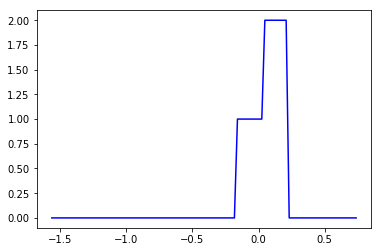

In [208]:
#BS test
r = 0.05
T = 1.0
K = 100.0
dK = 20
d = [1.0,1.0,-2.0]
sigma = 0.1
S_a = 20
S_b = 200
m=100
n=100
def X(S,k):
    return np.log(S/k)+(r-0.5*sigma**2)*T
x_a = X(S_a,K)
x_b = X(S_b,K)
xx = np.linspace(x_a, x_b, m+1)
x_k = X(K-dK,K)
x_k1 = X(K,K)
x_k2 = X(K+dK,K)
u_0 = []
for x in xx:
    v = 0.0
    if x>=x_k:
        v+=d[0]
    if x>=x_k1:
        v+=d[1]
    if x>=x_k2:
        v+=d[2]
    u_0.append(v)
u_0 = np.array(u_0)
plt.plot(xx,u_0,'b')

Time 0.1 probability total = 0.5756462732485114
Time 0.2 probability total = 0.5756462732485115
Time 0.3 probability total = 0.5756462732485116
Time 0.4 probability total = 0.5756462732485162
Time 0.5 probability total = 0.5756462732491603
Time 0.6 probability total = 0.5756462732684494
Time 0.7 probability total = 0.5756462735037483
Time 0.8 probability total = 0.5756462750988026
Time 0.9 probability total = 0.5756462822926494
Time 1.0 probability total = 0.5756463064662212


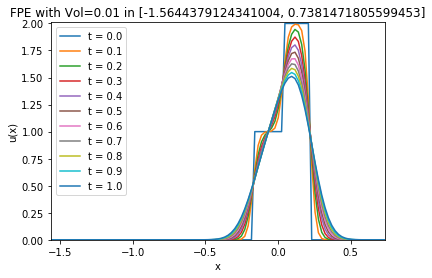

In [209]:
p_t,xx = solve_fpe(m,n,T,sigma,x_a,x_b,u_0)

Text(0.5,1,u'Max Pointwise Error = 0.2622875710192478')

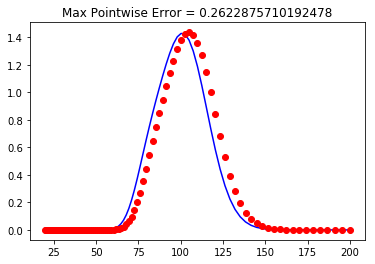

In [210]:
V_t = p_t*np.exp(-r*T)
S_t = np.array([K*np.exp(x-(r-0.5*sigma**2)*T) for x in xx])
true_V = d[0]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K-dK))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
true_V+=d[1]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
true_V+=d[2]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K+dK))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
plt.plot(S_t, true_V,'b')
plt.plot(S_t,V_t,'ro')
plt.title('Max Pointwise Error = '+str(max(abs(true_V-V_t))))

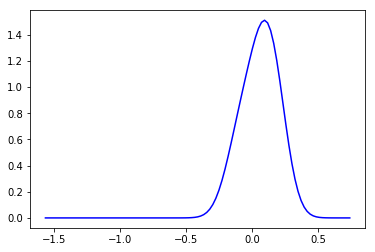

In [211]:
plt.plot(xx,p_t,'b')

Time 0.1 probability total = 0.5756462805930963
Time 0.2 probability total = 0.5756462741038076
Time 0.3 probability total = 0.575646273242255
Time 0.4 probability total = 0.5756462732494755
Time 0.5 probability total = 0.5756462732478816
Time 0.6 probability total = 0.575646273249094
Time 0.7 probability total = 0.5756462732477716
Time 0.8 probability total = 0.5756462732483588
Time 0.9 probability total = 0.5756462731906072
Time 1.0 probability total = 0.5756462711803256


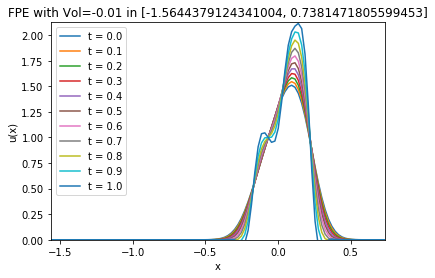

In [212]:
p_0,xx = solve_fpe_back(m,n,T,sigma,x_a,x_b,p_t)